Скачайте материалы к занятию.

Проанализируйте ряды и сделайте их стационарными.

Пришлите решение в виде ссылки на GitHub с ноутбуком.


In [260]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [261]:
#загрузим файлы в датафреймы
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [262]:
#добавим нужные столбцы датафреймов в словарь 
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [321]:
# графики
def graf(series):
  for key, value in series.items():
    with plt.style.context('bmh'):
      plt.figure(figsize=(10, 3))
      plt.plot(value, color='blue')
      plt.title(key)


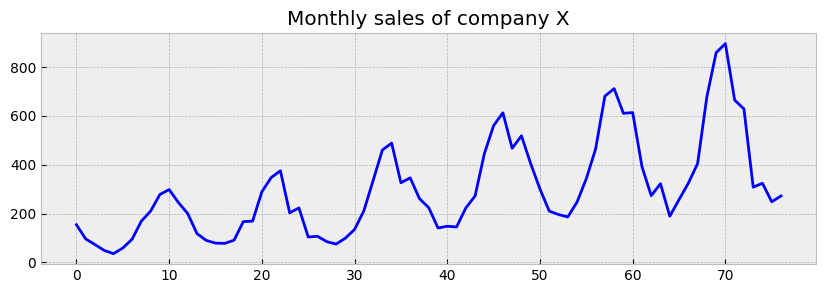

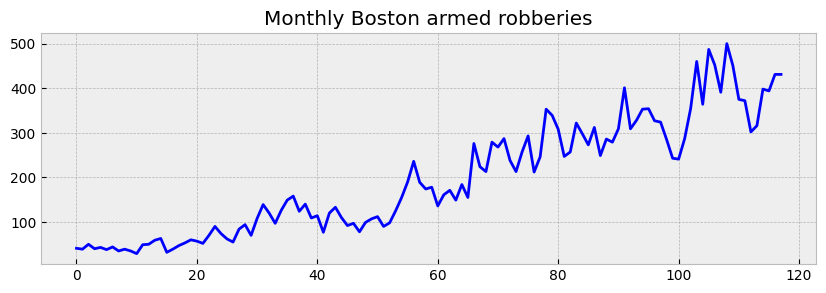

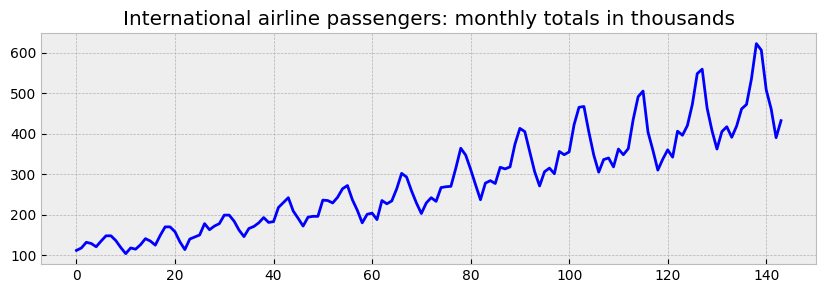

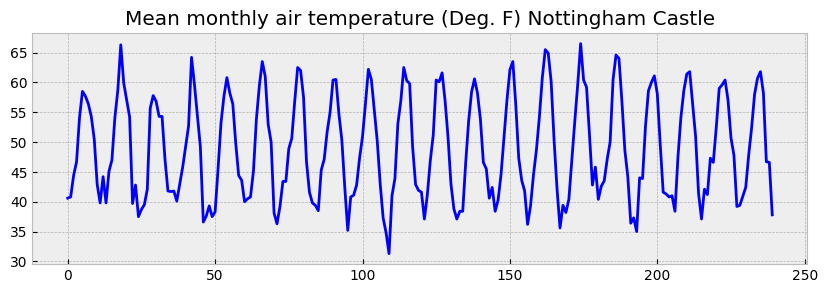

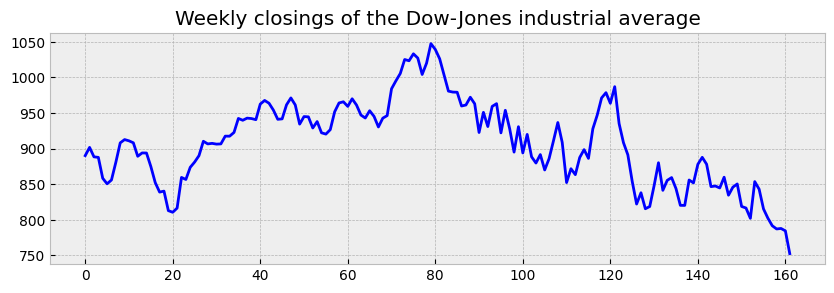

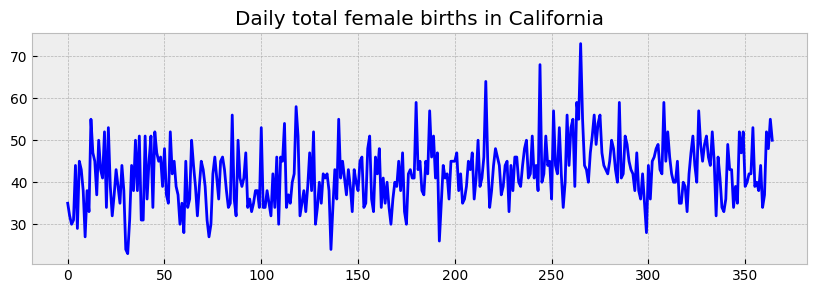

In [322]:
  graf(all_series)

In [265]:
# посмотрим, какие из рядов уже являются стационарными (тест Дики-Фуллера отвергает гипотезу о нестационарности ряда, p-value < 0.05). Напишем функцию проверки для словаря
def chek_adfuller(all_series):
  for series_key, series_val in all_series.items():
    p = round(adfuller(series_val, autolag='AIC')[1], 4)
    print('p-value of Dickey-Fuller Test: of "',series_key,'" is', p)
    if p<0.05:
      print('\033[32m отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ \033[0;0m \n')
    else:
      print('\033[31m НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ \033[0;0m \n')

In [266]:
chek_adfuller(all_series)

p-value of Dickey-Fuller Test: of " Monthly sales of company X " is 0.9889
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Monthly Boston armed robberies " is 0.9943
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " International airline passengers: monthly totals in thousands " is 0.9919
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Mean monthly air temperature (Deg. F) Nottingham Castle " is 0.017
 отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Weekly closings of the Dow-Jones industrial average " is 0.6225
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Daily total female births in California " is 0.0001
 отвергаем гипотезу о нестационарно

По предварительному анализу можем сделать вывод, что два ряда из шести (Mean monthly air temperature, Daily total female births in California) можно считать стационарными

Остальные четыре ряда надо сделать стационарными

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [287]:
all_series_boxcox ={}

In [288]:
for key,value in all_series.items():
  if key not in ['Daily total female births in California', 'Mean monthly air temperature (Deg. F) Nottingham Castle']:
    all_series_boxcox[key] = boxcox(value, 0)


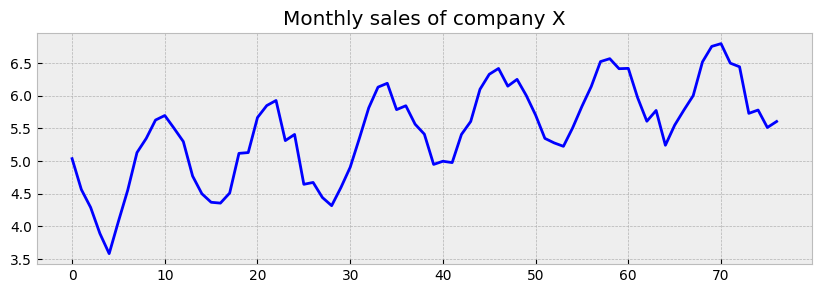

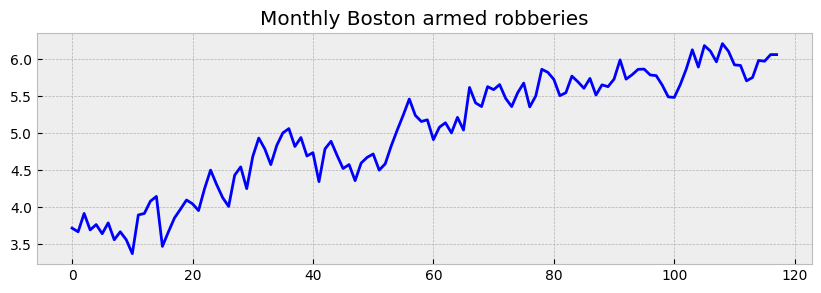

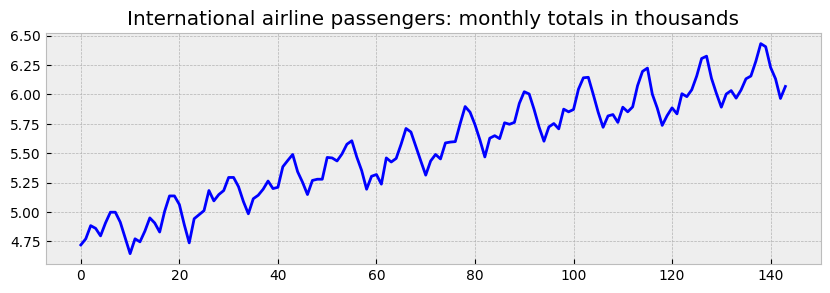

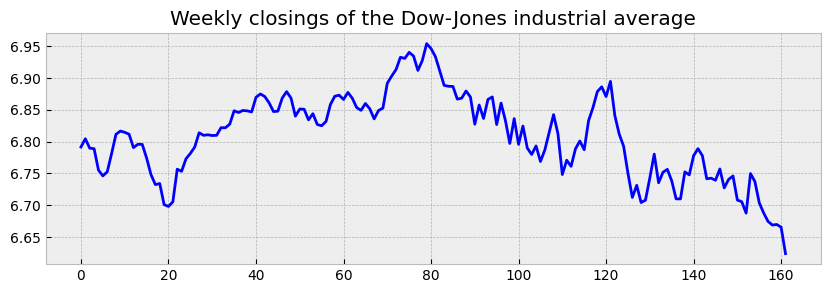

In [323]:
graf(all_series_boxcox)

Проверим, помогло ли это?

In [289]:
chek_adfuller(all_series_boxcox)

p-value of Dickey-Fuller Test: of " Monthly sales of company X " is 0.7853
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Monthly Boston armed robberies " is 0.2808
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " International airline passengers: monthly totals in thousands " is 0.4224
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Weekly closings of the Dow-Jones industrial average " is 0.6691
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  



Не помогло. Хотя значения p стали меньше

In [290]:
# Дифференцируем
def diff(series):
 series_new = series[1:] - series[:-1]
 return series_new

In [293]:
for key,value in all_series_boxcox.items():
  all_series_diff[key] = diff(value)

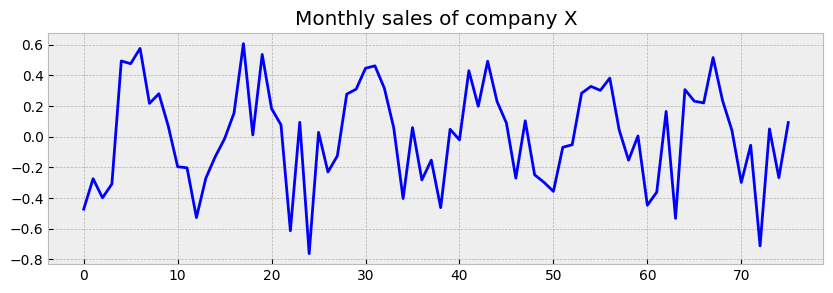

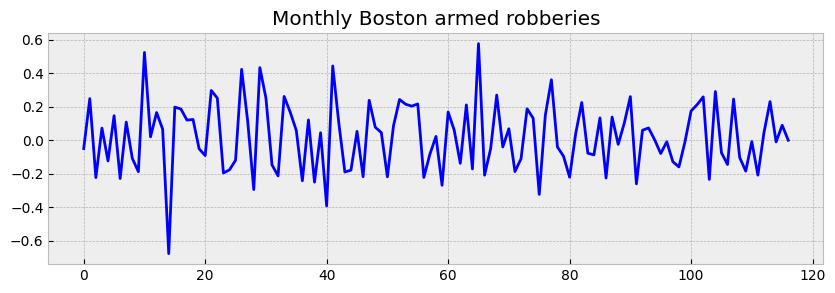

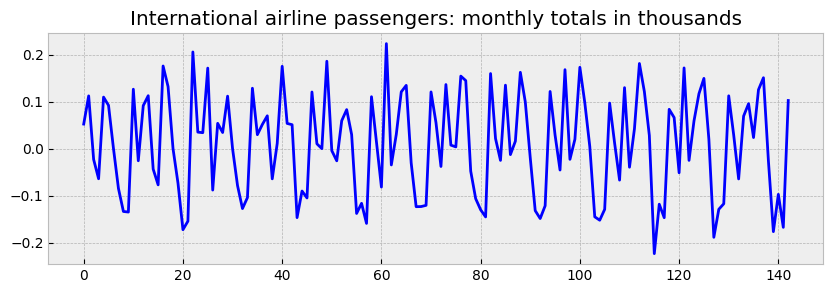

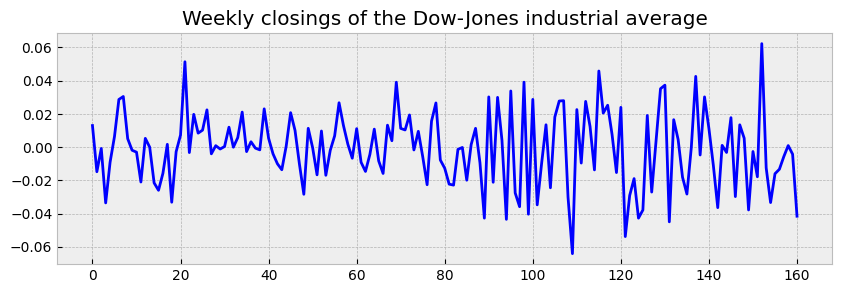

In [324]:
graf(all_series_diff)

In [294]:
chek_adfuller(all_series_diff)

p-value of Dickey-Fuller Test: of " Monthly sales of company X " is 0.024
 отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Monthly Boston armed robberies " is 0.0
 отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " International airline passengers: monthly totals in thousands " is 0.0711
 НЕ отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд НЕСТАЦИОНАРНЫМ  

p-value of Dickey-Fuller Test: of " Weekly closings of the Dow-Jones industrial average " is 0.0
 отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ  



Остался один нестационарный ряд. Уберем в нем сезонность

In [295]:
# Уберем сезонность
def noseason(series):
 series_new = series[12:] - series[:-12]
 return series_new

In [296]:
all_series_noseason = {}
for key,value in all_series_diff.items():
  if key == 'International airline passengers: monthly totals in thousands':
    all_series_noseason[key] = noseason(all_series_diff[key])


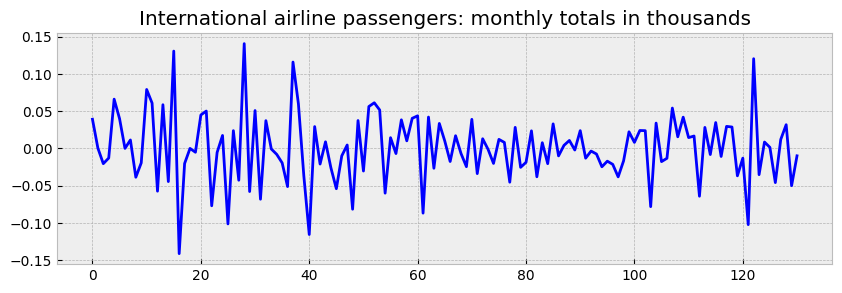

In [325]:
graf(all_series_noseason)

In [297]:
chek_adfuller(all_series_noseason)

p-value of Dickey-Fuller Test: of " International airline passengers: monthly totals in thousands " is 0.0002
 отвергаем гипотезу о нестационарности ряда, т.е. считаем ряд СТАЦИОНАРНЫМ  

